In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df.drop('SibSp' , inplace = True , axis = 1)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df['Cabin'].fillna('Not Applicable' , inplace=True)

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

[Text(0.5, 0, 'Passenger Class'),
 Text(0, 0.5, 'Total Number of deaths'),
 Text(0.5, 1.0, 'Survival Rate against class')]

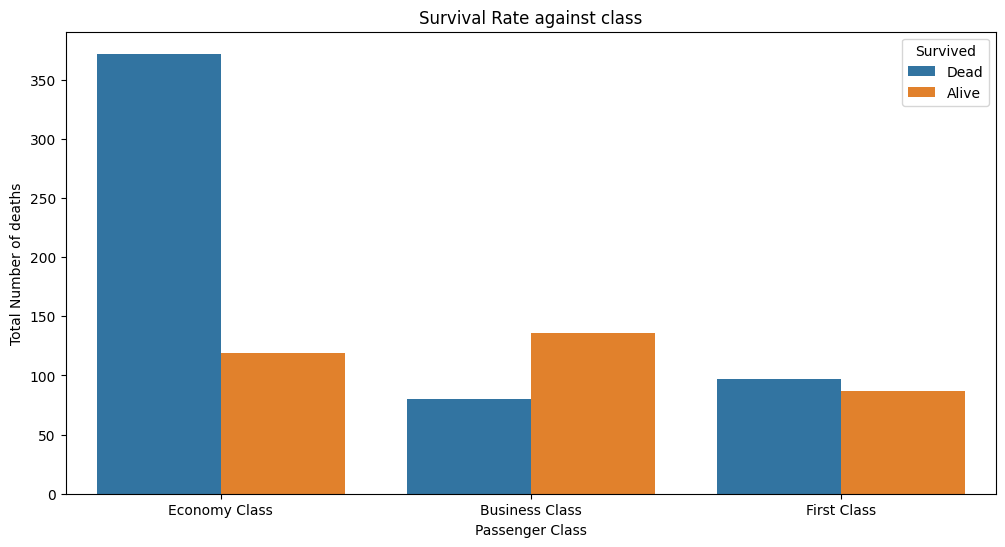

In [35]:
plt.figure(figsize = [12,6])
df['Survived'] = df['Survived'].map({
    0:'Dead',
    1:'Alive'
})
df['Pclass'] = df['Pclass'].map({
    1:'Business Class',
    2:'First Class',
    3:'Economy Class'
})
ax = sns.countplot(data = df , x = 'Pclass' , hue = 'Survived')
ax.set(xlabel = 'Passenger Class' , ylabel = 'Total Number of deaths' , title = 'Survival Rate against class')

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Total Number of deaths'),
 Text(0.5, 1.0, 'Survival Rate against class')]

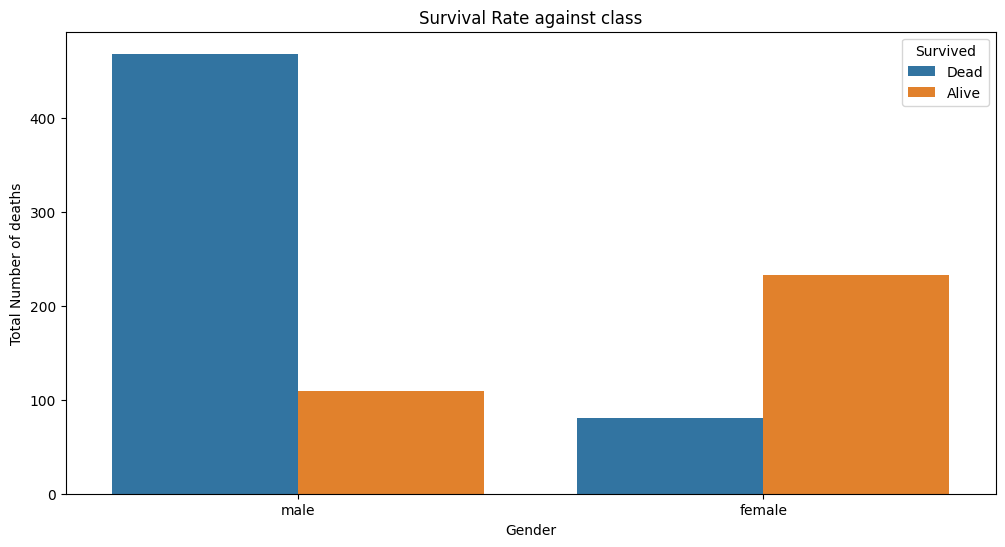

In [38]:
plt.figure(figsize = [12,6])
ax = sns.countplot(data = df , x = 'Sex' , hue = 'Survived')
ax.set(xlabel = 'Gender' , ylabel = 'Total Number of deaths' , title = 'Survival Rate against class')

[Text(0.5, 0, 'Categories'),
 Text(0, 0.5, 'Total Number of deaths'),
 Text(0.5, 1.0, 'Survival Rate against Age Groups')]

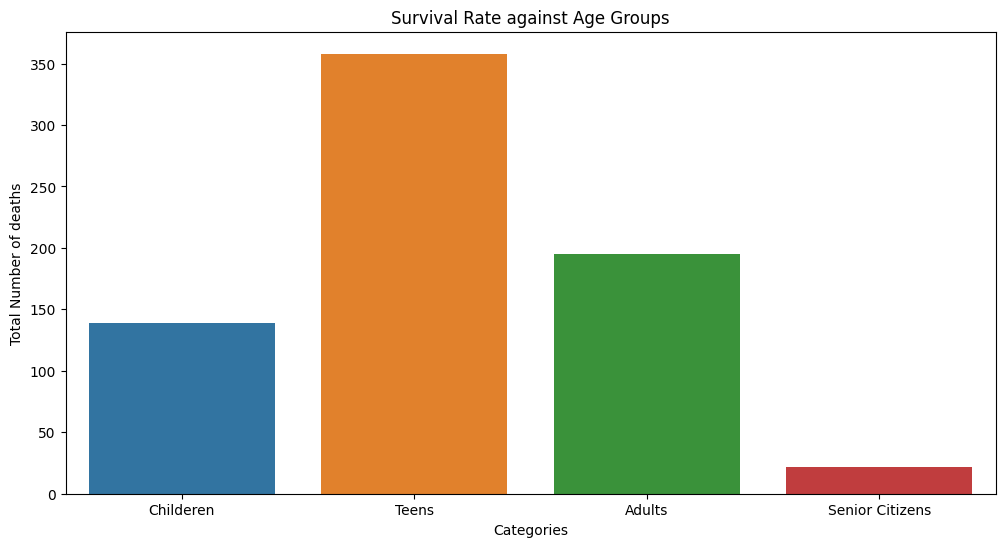

In [40]:
interval = (0,18,35,60,120)
categories = ('Childeren', 'Teens' , 'Adults' , 'Senior Citizens')
plt.figure(figsize = [12,6])
df['Category'] = pd.cut(df.Age , interval , labels = categories)
ax = sns.countplot(data = df ,x = 'Category')
ax.set(xlabel = 'Categories' , ylabel = 'Total Number of deaths' , title = 'Survival Rate against Age Groups')
